In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# given that encoding is 'ISO-8859-1'
df = pd.read_csv(r"C:\Users\vedan\Downloads\data.csv",encoding='ISO-8859-1')
df.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
164099,550636,22246,MAGIC GARDEN FELT GARLAND,1,4/19/2011 15:37,4.13,NaN,United Kingdom
456145,575677,20767,BLUE PAISLEY JOURNAL,1,11/10/2011 15:18,2.55,NaN,United Kingdom
430565,573585,22189,CREAM HEART CARD HOLDER,1,10/31/2011 14:41,8.29,NaN,United Kingdom
310677,564197,85066,CREAM SWEETHEART MINI CHEST,2,8/23/2011 17:13,12.75,13425.0,United Kingdom
475394,576888,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,11/16/2011 17:16,1.45,14948.0,United Kingdom
177224,C552049,22585,PACK OF 6 BIRDY GIFT TAGS,-24,5/6/2011 10:00,1.25,17548.0,United Kingdom
248252,558809,DOT,DOTCOM POSTAGE,1,7/4/2011 11:10,146.50,NaN,United Kingdom


In [3]:
dup = df[df.duplicated()]
print('length of Duplicate rows:',len(dup))
dup.head()

length of Duplicate rows: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [4]:
df.drop_duplicates(inplace = True)
df.shape

(536641, 8)

In [5]:
# finding those who have no CustomerID
NoCustId = df[df['CustomerID'].isnull()]
index_with_No_customer_ID = NoCustId['InvoiceNo'].index
NoCustId

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [6]:
top20withNoID = NoCustId['InvoiceNo'].value_counts().head(20)
top20withNoID.head()

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: count, dtype: int64

In [7]:
print(top20withNoID.values)

[1114  749  731  721  705  687  676  675  662  652  650  645  635  629
  622  620  606  601  597  593]


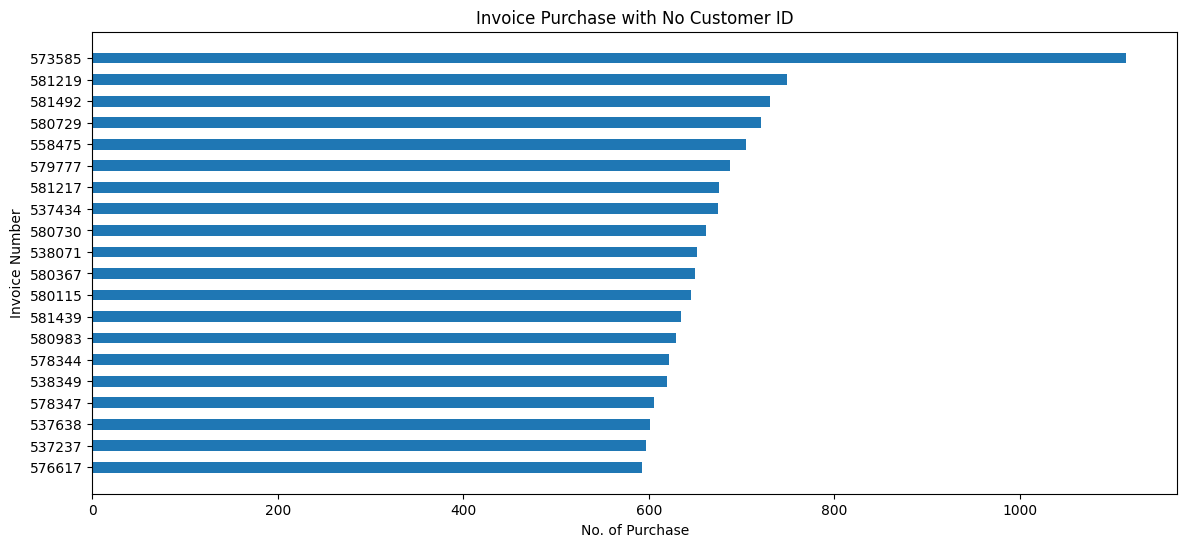

In [8]:
import matplotlib.pyplot as plt
label = top20withNoID.index
plt.figure(figsize=(14,6))
plt.barh(top20withNoID.index,top20withNoID.values,height=0.5)
# plt.grid()
plt.xlabel('No. of Purchase')
plt.ylabel('Invoice Number')
plt.title("Invoice Purchase with No Customer ID")
plt.gca().invert_yaxis() 
plt.show()

> Here 573585 Invoice have done most Purchase with No customer ID

In [9]:
board = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
productperbasket = board.rename(columns = {'InvoiceDate':'Number of products'})
productperbasket_dataframe=productperbasket[:10].sort_values('Number of products',ascending=False)
productperbasket_dataframe

,CustomerID,InvoiceNo,Number of products
7,12347.0,573511,47
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
6,12347.0,562032,22
5,12347.0,556201,18
9,12348.0,539318,17
8,12347.0,581180,11
0,12346.0,541431,1
1,12346.0,C541433,1


## Feature Engineering

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
df.dropna(subset='CustomerID',inplace = True )

In [13]:
print(df.isnull().sum())
print(df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(401604, 8)


**DATA ANALYSIS**

In [14]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64

In [15]:
df["StockCode"].value_counts()

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: count, Length: 3684, dtype: int64

In [16]:
df["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: count, Length: 3896, dtype: int64

In [17]:
df["Country"].value_counts().head(10)

Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: count, dtype: int64

change of Invoicedate column dtype to datetime...

In [18]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [19]:
df["Month"] = df["InvoiceDate"].dt.month

In [20]:
df["Year"] = df["InvoiceDate"].dt.year

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011


Create new column total_bill to show the actual amount of one purchase

In [22]:
# multiplying quality column to Unit Price column
df['total_bill'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,16.60


In [23]:
# Create annual_total_bill using merge and groupby functions

In [24]:
annual_bill = df.groupby('CustomerID')['total_bill'].sum()
df= df.merge(annual_bill, on='CustomerID', suffixes=('','_annualy'))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


In [25]:
data=df.copy()

In [26]:
# Adding Week column to dataset
data['dayofweek']=data['InvoiceDate'].dt.dayofweek
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55,4
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55,4
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55,4
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55,4


In [27]:
# rough
data['dayofweek'].value_counts()

dayofweek
3    81575
2    69753
1    67376
0    65715
6    61673
4    55512
Name: count, dtype: int64

>> market is closed on Saturday

In [28]:
# finding the range of data Duration
print(data['InvoiceDate'].min())
print(data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           401604 non-null  object        
 1   StockCode           401604 non-null  object        
 2   Description         401604 non-null  object        
 3   Quantity            401604 non-null  int64         
 4   InvoiceDate         401604 non-null  datetime64[ns]
 5   UnitPrice           401604 non-null  float64       
 6   CustomerID          401604 non-null  float64       
 7   Country             401604 non-null  object        
 8   Month               401604 non-null  int32         
 9   Year                401604 non-null  int32         
 10  total_bill          401604 non-null  float64       
 11  total_bill_annualy  401604 non-null  float64       
 12  dayofweek           401604 non-null  int32         
dtypes: datetime64[ns](1), float64

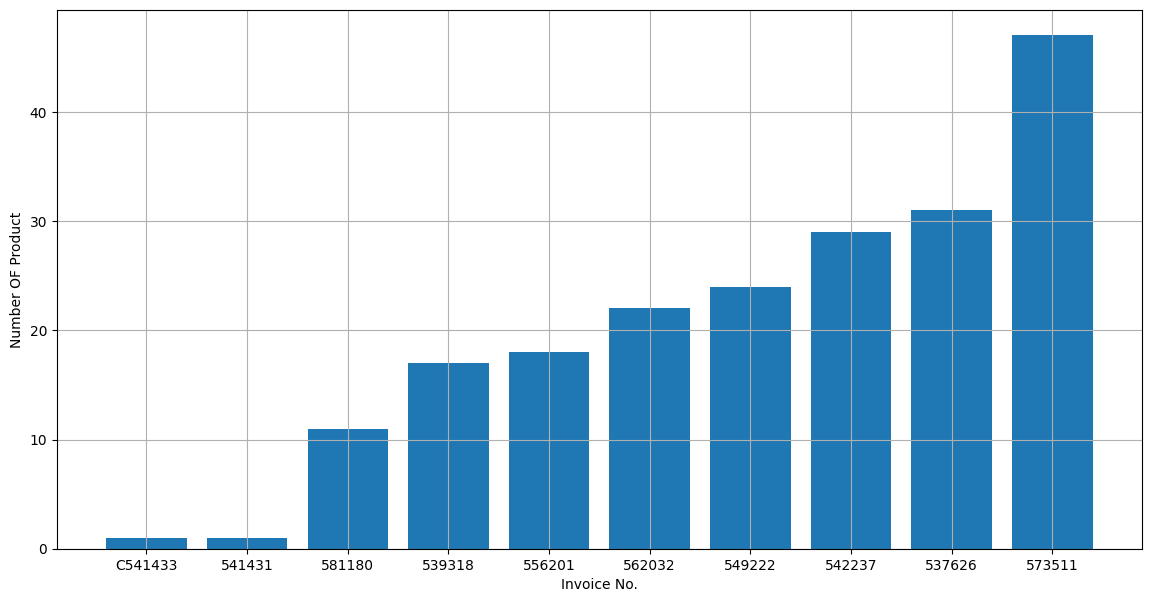

In [30]:
plt.figure(figsize=(14,7))
plt.bar(productperbasket_dataframe['InvoiceNo'].astype(str), productperbasket_dataframe['Number of products'])
plt.gca().invert_xaxis() 
plt.grid()
plt.xlabel('Invoice No.')
plt.ylabel('Number OF Product')
plt.show()

In [31]:
# finding monthly Bill
monthlyTrend = data.groupby(['Year','Month'])['total_bill'].sum()

# Convert the MultiIndex to a DataFrame
monthlyTrend = monthlyTrend.reset_index()
monthlyTrend.columns = ['Year', 'Month', 'total_bill']
monthlyTrend['Date'] = '(' +monthlyTrend['Year'].astype(str) + ',' + monthlyTrend['Month'].astype(str).str.zfill(2)+')'
monthlyTrend

,Year,Month,total_bill,Date
0,2010,12,552372.860,"(2010,12)"
1,2011,1,473731.900,"(2011,01)"
2,2011,2,435534.070,"(2011,02)"
3,2011,3,578576.210,"(2011,03)"
4,2011,4,425222.671,"(2011,04)"
5,2011,5,647011.670,"(2011,05)"
6,2011,6,606862.520,"(2011,06)"
7,2011,7,573112.321,"(2011,07)"
8,2011,8,615078.090,"(2011,08)"
9,2011,9,929356.232,"(2011,09)"


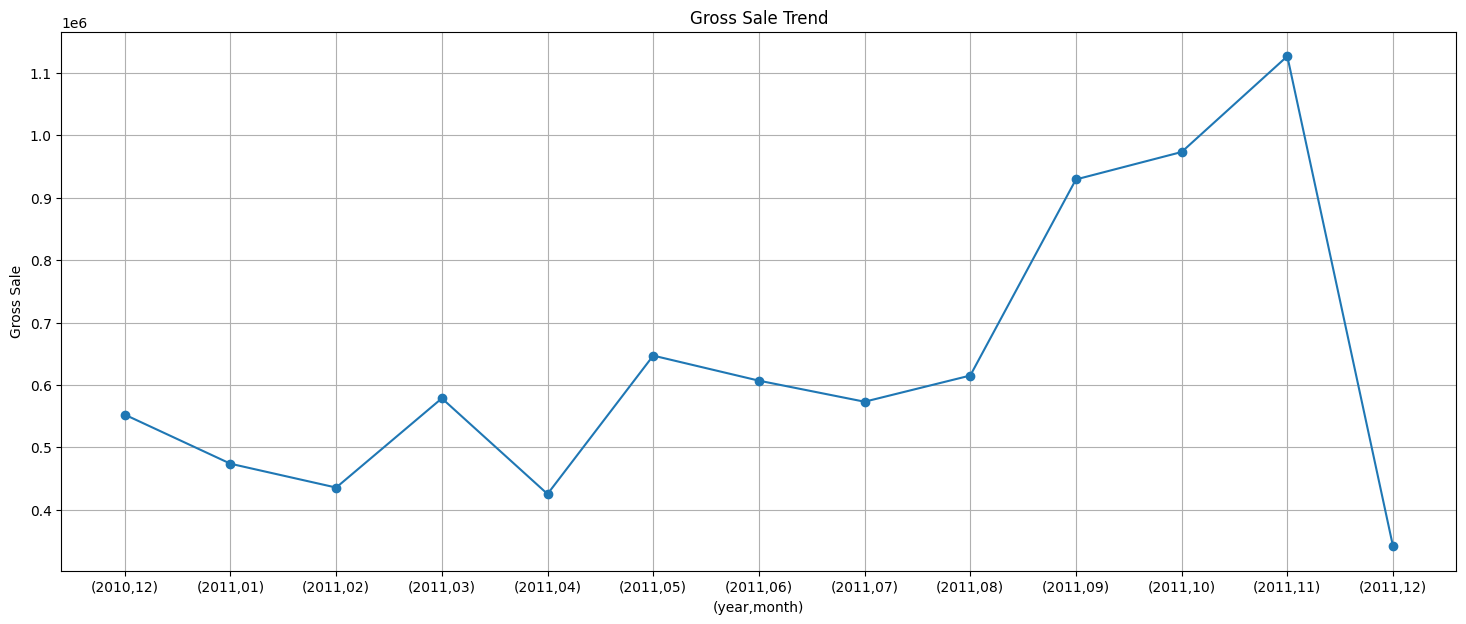

In [32]:
#ploting the spent of the year Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
plt.plot(monthlyTrend['Date'],monthlyTrend['total_bill'],marker='o')

plt.grid()
plt.ylabel('Gross Sale')
plt.xlabel("(year,month)")
plt.title('Gross Sale Trend')
plt.show()

In [33]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Year', 'total_bill',
       'total_bill_annualy', 'dayofweek'],
      dtype='object')

**Weekly Data**

In [34]:
group=data.groupby('dayofweek').agg({'total_bill':'sum','InvoiceNo':'nunique'})
group=group.reset_index().rename(columns={'total_bill':'Gross_Sales_day','InvoiceNo':'Total Order/day'})
group

,dayofweek,Gross_Sales_day,Total Order/day
0,0,1271078.601,3512
1,1,1562715.681,3892
2,2,1526440.000,4110
3,3,1902316.050,4978
4,4,1238556.741,3356
5,6,777412.351,2342


In [35]:
days = ['Mon','Tue','Wed','Thus','Fri','Sun']
r = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thus', 4: 'Fri', 6: 'Sun'}
group['dayofweek'] = group['dayofweek'].map(r)
group

,dayofweek,Gross_Sales_day,Total Order/day
0,Mon,1271078.601,3512
1,Tue,1562715.681,3892
2,Wed,1526440.000,4110
3,Thus,1902316.050,4978
4,Fri,1238556.741,3356
5,Sun,777412.351,2342


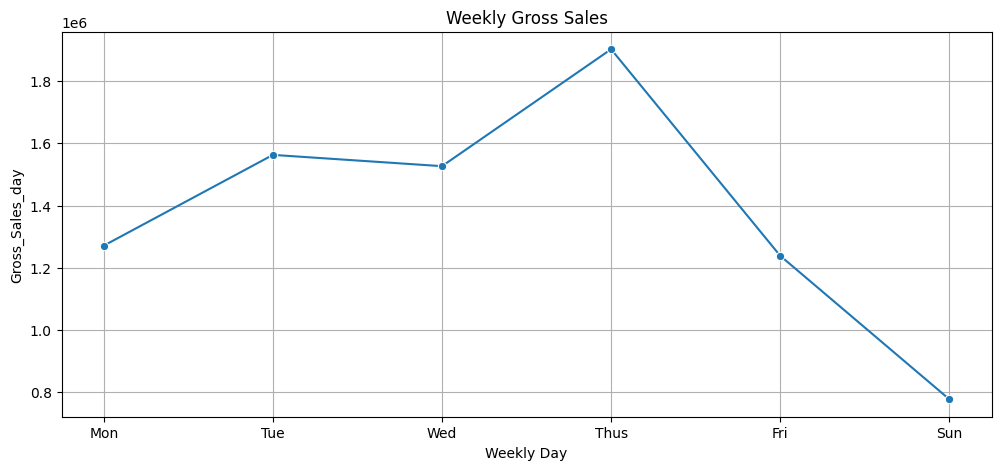

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(x = group['dayofweek'] ,y = group['Gross_Sales_day'], marker='o')
plt.grid()

plt.xlabel("Weekly Day")
plt.ylabel("Gross_Sales_day")
plt.xticks(days)
plt.title("Weekly Gross Sales")
plt.show()

> THURSDAY has maximum Sales = 1902316.050

In [37]:
group=data.groupby('Country').agg({'total_bill':'sum'}).reset_index().rename(columns={'total_bill':'Gross sales'}).sort_values(by='Gross sales',ascending=False).head(8)
group

,Country,Gross sales
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030


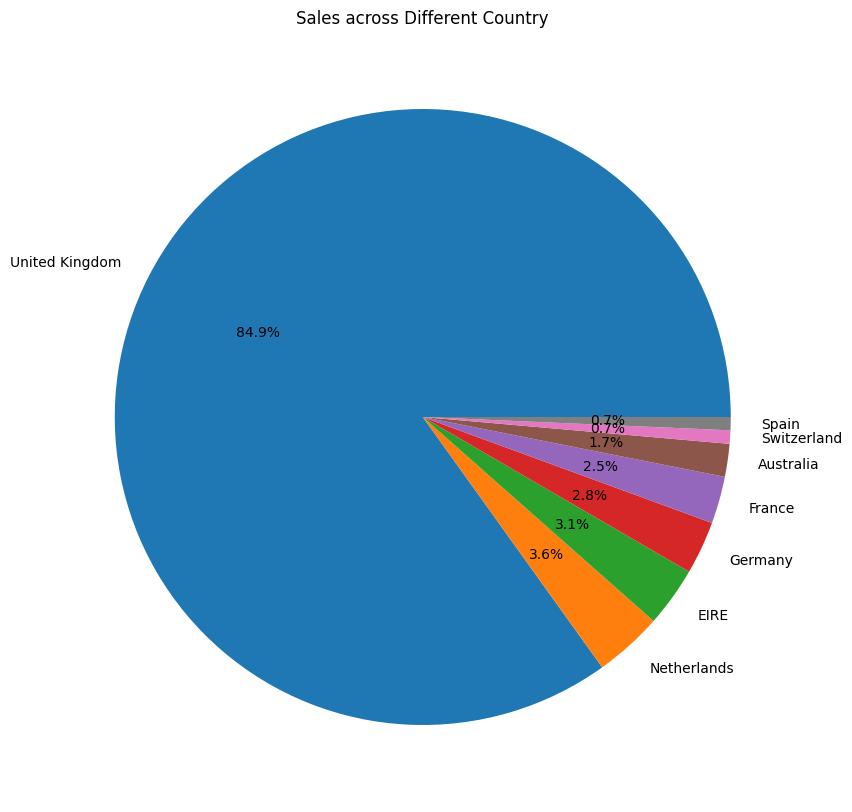

In [38]:
plt.figure(figsize=(10,10))
plt.pie(group['Gross sales'],labels = group['Country'],autopct='%1.1f%%')
plt.title("Sales across Different Country")
plt.show()

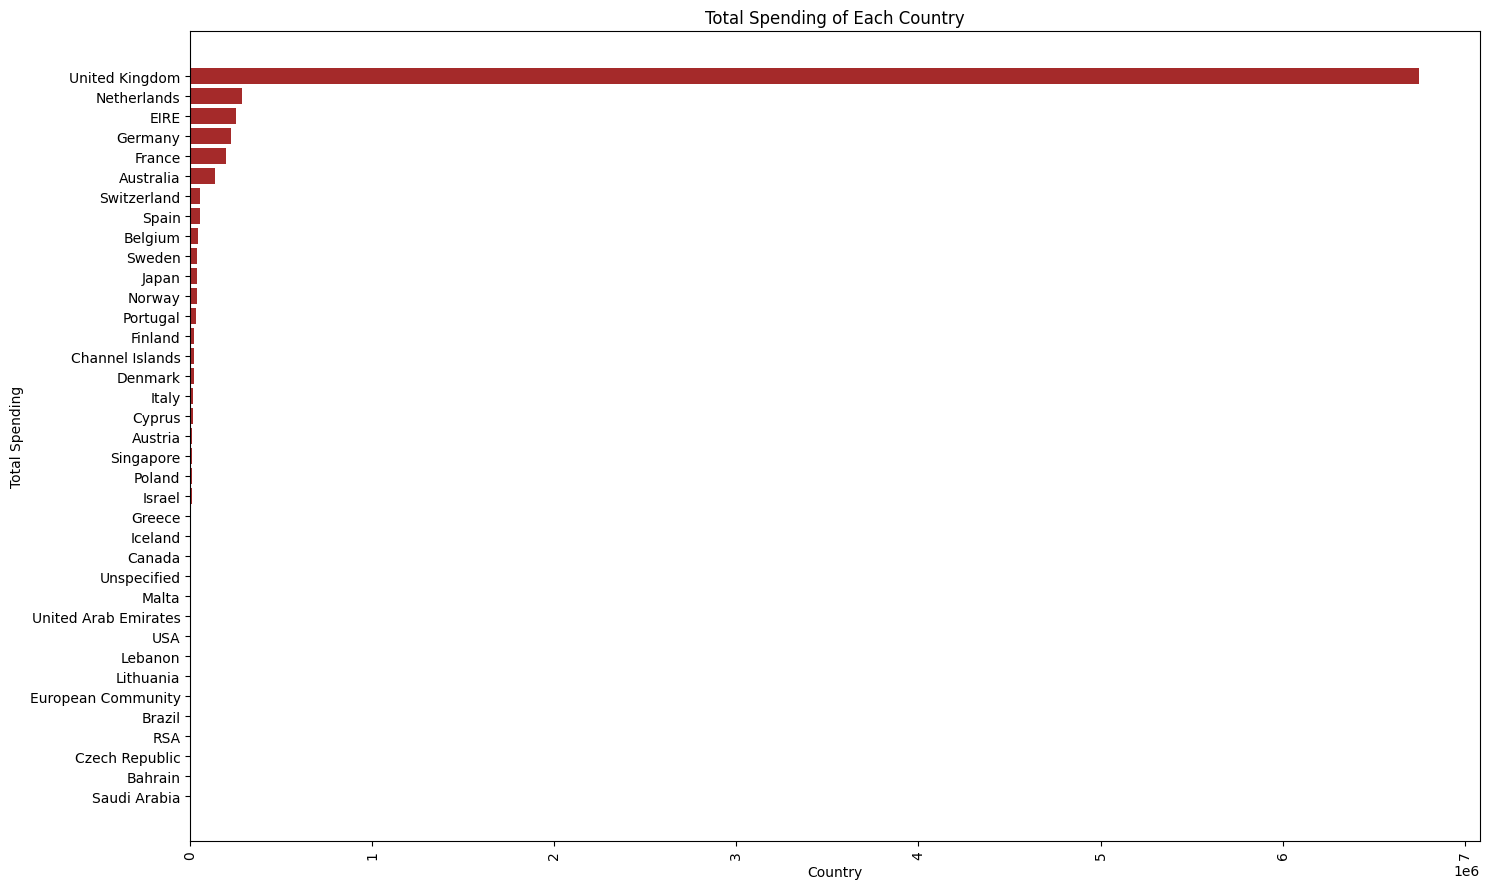

In [39]:

country_spending = df.groupby('Country')['total_bill'].sum()
country_spending = country_spending.sort_values(ascending=False)
plt.figure(figsize=(15, 9))
plt.barh(country_spending.index, country_spending.values,color='brown')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Total Spending of Each Country')
plt.xticks(rotation=90)
# this invert the chart 
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


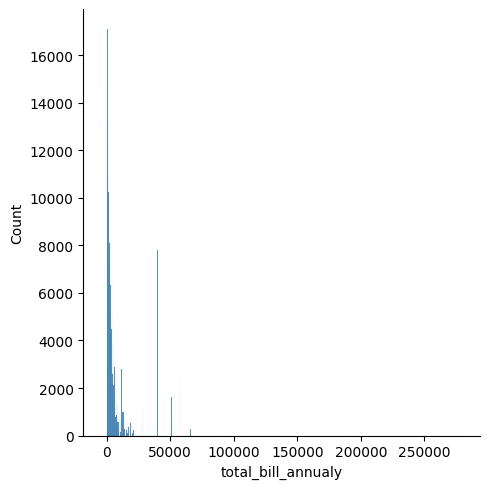

In [40]:
#This is the distribution of total_anuall_bill
sns.displot(df['total_bill_annualy'])
plt.show()

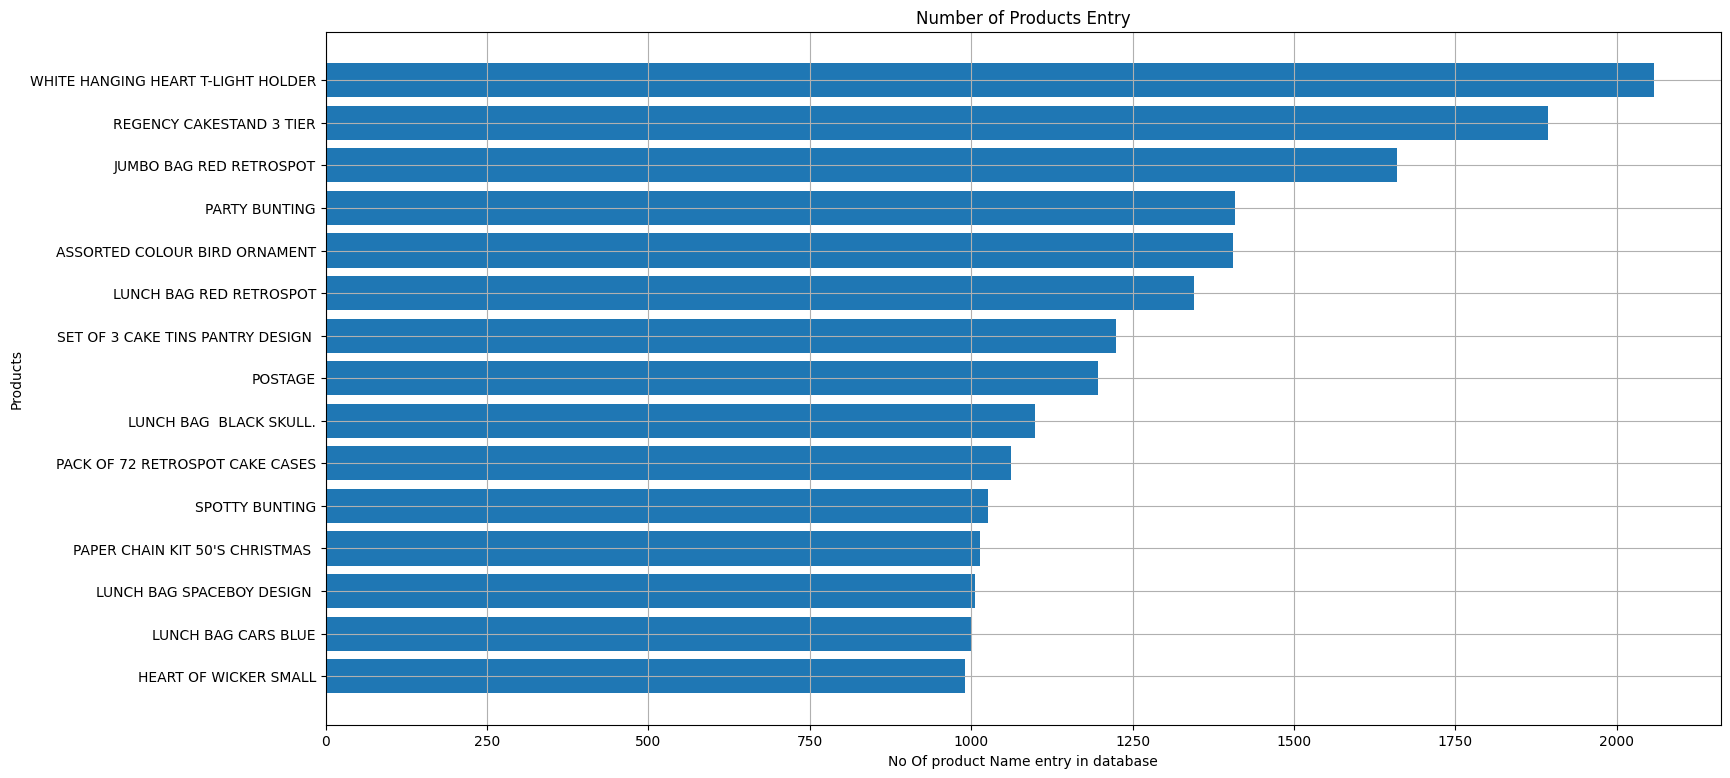

In [41]:
plt.figure(figsize=(18,9))
Description_cou = df['Description'].value_counts()
plt.barh(Description_cou.index[0:15],Description_cou.values[0:15])
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("No Of product Name entry in database")
plt.ylabel("Products")
plt.title("Number of Products Entry")
plt.show()

## PREDECTIVE MODELING

In [42]:
# Importing neccasary libraries and models
from sklearn.model_selection import train_test_split , GridSearchCV

In [43]:
# Encoding Catgorical variables like Description and Country for regression models using LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           401604 non-null  object        
 1   StockCode           401604 non-null  object        
 2   Description         401604 non-null  object        
 3   Quantity            401604 non-null  int64         
 4   InvoiceDate         401604 non-null  datetime64[ns]
 5   UnitPrice           401604 non-null  float64       
 6   CustomerID          401604 non-null  float64       
 7   Country             401604 non-null  object        
 8   Month               401604 non-null  int32         
 9   Year                401604 non-null  int32         
 10  total_bill          401604 non-null  float64       
 11  total_bill_annualy  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 33.7+ MB

In [46]:
X = df.drop(['total_bill_annualy','StockCode','InvoiceDate','InvoiceNo','Country','Description','total_bill'],axis=1)
y = df['total_bill_annualy']

In [47]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [48]:
#spliting data in train nd test
X_train, X_test, y_train,y_test = train_test_split(X_poly,y , test_size=0.4, random_state=122)


# LINAER REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [50]:
linearR = LinearRegression()
linearR.fit(X_train, y_train)

LinearRegression()

In [51]:
y_train_pred = linearR.predict(X_train)
y_test_pred = linearR.predict(X_test)

In [52]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Overfitting or Underfitting
if test_r2 > 0.8:
    if train_r2 > test_r2:
        if abs(train_r2-test_r2)>0.1:
            print("May be overfitting.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
        elif abs(train_r2-test_r2)<= 0.1:
            print("Seems to be acceptable.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
    elif train_r2 < 0.6 and test_r2 < 0.6:
        print("may be underfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    else:
        print("Seems to be performing well.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
else:
    if abs(train_r2-test_r2)>0.1:
        print("May be overfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    elif abs(train_r2-test_r2)<= 0.1:
        print("Seems to be acceptable, data trained well on training but NOT on the testing (unseen data) ")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)

Seems to be acceptable, data trained well on training but NOT on the testing (unseen data) 
r2 score train: 0.012954482080220764
r2 score test: 0.011656380530634891


In [53]:
linearR.coef_

array([ 0.00000000e+00,  9.99780598e+04, -1.73606540e+04, -9.89920182e+02,
        1.34696748e-04, -3.31067941e-04, -2.19096702e-05,  9.30758326e+00,
        1.42869034e-02, -6.48000542e+00, -4.98018468e+01,  4.16877476e-05,
        6.14037023e-03,  2.10172168e+00,  8.58406687e+00, -6.10549979e-04,
        8.13730210e-03,  5.01028709e-01, -2.50544084e+01,  1.52847721e-01,
       -1.38362387e+00])

In [54]:
linearR.intercept_

5479684.183860518

**All Prediction**

In [55]:
y_train_pred

array([12323.90917641, 13608.00465389, 12795.11014419, ...,
        6373.49711286,  9865.78400549, 11459.23196489])

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


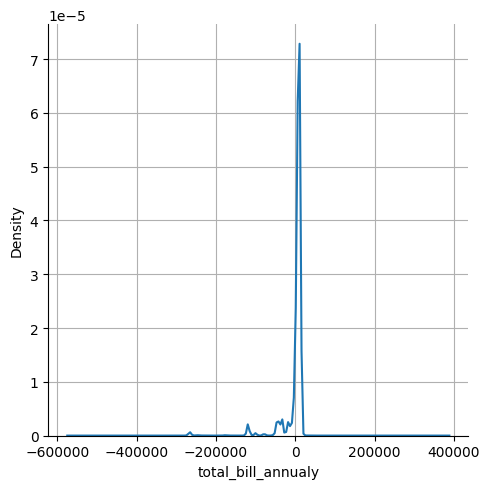

In [56]:
# showing diff between pred and actual! # test prediction
sns.displot(y_test_pred - y_test, kind='kde')
plt.grid()
plt.show()

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


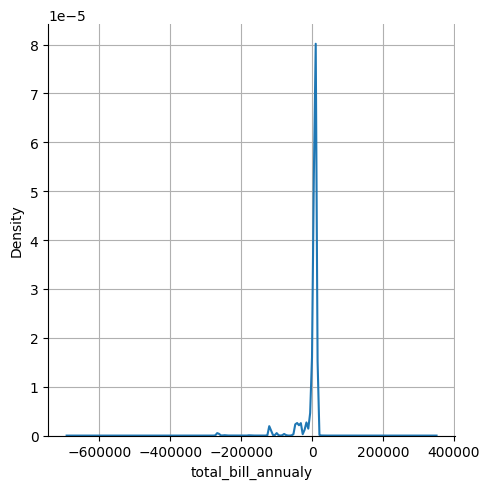

In [57]:
sns.displot(y_train_pred - y_train, kind='kde')
plt.grid()
plt.show()

In [58]:
# Calculation on test data 
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test,y_test_pred))
print('RMSE:', mean_squared_error(y_test,y_test_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test,y_test_pred))

MAE: 14102.409921817996
MSE: 923224333.7145878
RMSE: 30384.606854698446
R2_LINEAR: 0.011656380530634891


In [59]:
#  checking overfitting
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', mean_squared_error(y_train, y_train_pred)**0.5)
print('R2_LINEAR:', r2_score(y_train,y_train_pred))

MAE: 13964.168344149832
MSE: 894337348.8104072
RMSE: 29905.47355937383
R2_LINEAR: 0.012954482080220764


### for poly degree = 3

In [60]:

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [61]:
X_train, X_test, y_train,y_test = train_test_split(X_poly,y , test_size=0.4, random_state=122)

In [62]:
linearR = LinearRegression()
linearR.fit(X_train, y_train)

LinearRegression()

In [63]:
y_train_pred = linearR.predict(X_train)
y_test_pred = linearR.predict(X_test)

In [64]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Overfitting or Underfitting
if train_r2 > test_r2:
    print("May be overfitting.")
    print("r2 score train:",train_r2)
    print("r2 score test:",test_r2)
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("may be underfitting.")
    print("r2 score train:",train_r2)
    print("r2 score test:",test_r2)
else:
    print("Seems to be performing well.")
    print("r2 score train:",train_r2)
    print("r2 score test:",test_r2)

May be overfitting.
r2 score train: 0.09512801219897671
r2 score test: 0.002773421001095455


C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


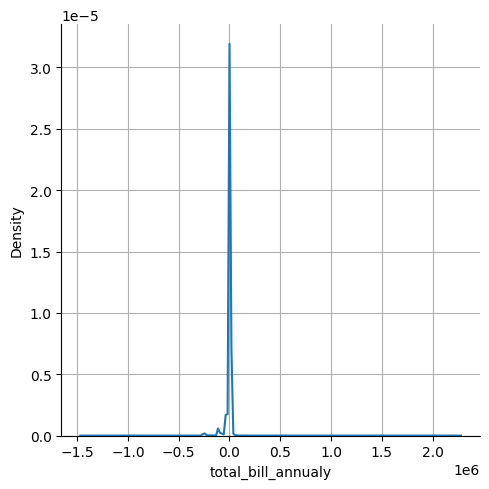

In [65]:
# test prediction 
sns.displot(y_test_pred - y_test, kind='kde')
plt.grid()
plt.show()

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


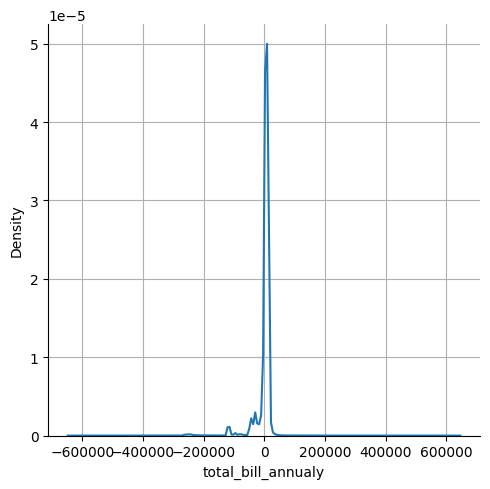

In [66]:
sns.displot(y_train_pred - y_train, kind='kde')
plt.grid()
plt.show()

## DECISION TREE REGRESSOR

In [67]:
dt_reg = DecisionTreeRegressor(random_state = 123)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [68]:
# for testing DATA
y_pred = dt_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 200.20035899094052
MSE: 8172034.211245961
RMSE: 2858.6770036585035
R2_LINEAR: 0.9912515543884405


In [69]:
# for training DATA
y_pred_train = dt_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 1.3902118128525926e-10
MSE: 4.815348195907046e-19
RMSE: 6.93927099622651e-10
R2_LINEAR: 1.0


In [70]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

In [71]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Overfitting or Underfitting
if test_r2 > 0.8:
    if train_r2 > test_r2:
        if abs(train_r2-test_r2)>0.1:
            print("May be overfitting.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
        elif abs(train_r2-test_r2)<= 0.1:
            print("Excellent acceptable.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
    elif train_r2 < 0.6 and test_r2 < 0.6:
        print("may be underfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    else:
        print("Seems to be performing well.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
else:
    if abs(train_r2-test_r2)>0.1:
        print("May be overfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    elif abs(train_r2-test_r2)<= 0.1:
        print("Seems to be acceptable, data trained well on training but NOT on the testing (unseen data) ")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)

Excellent acceptable.
r2 score train: 1.0
r2 score test: 0.9912515543884405


> the difference in r2 score test and train is too small so that it indicates the data trained well on training and also the testing (unseen data)

In [72]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


## RANDOM FOREST REGRESSION

In [73]:
X = df.drop(['total_bill_annualy','StockCode','InvoiceDate','InvoiceNo','Country','Description','total_bill'],axis=1)
y = df['total_bill_annualy']
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.4, random_state=122)

In [74]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

In [76]:
y_pred = rf_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 255.34044088971874
MSE: 5131448.2583037475
RMSE: 2265.2700188506774
R2_LINEAR: 0.994506606943162


In [77]:
y_pred_train = rf_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 93.94951305151568
MSE: 798248.319161836
RMSE: 893.447435030084
R2_LINEAR: 0.9991190042251241


In [78]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Overfitting or Underfitting
if test_r2 > 0.8:
    if train_r2 > test_r2:
        if abs(train_r2-test_r2)>0.1:
            print("May be overfitting.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
        elif abs(train_r2-test_r2)<= 0.1:
            print("Excellent acceptable.")
            print("r2 score train:",train_r2)
            print("r2 score test:",test_r2)
    elif train_r2 < 0.6 and test_r2 < 0.6:
        print("may be underfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    else:
        print("Seems to be performing well.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
else:
    if abs(train_r2-test_r2)>0.1:
        print("May be overfitting.")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)
    elif abs(train_r2-test_r2)<= 0.1:
        print("Seems to be acceptable, data trained well on training but NOT on the testing (unseen data) ")
        print("r2 score train:",train_r2)
        print("r2 score test:",test_r2)

Excellent acceptable.
r2 score train: 0.9991190042251241
r2 score test: 0.994506606943162


## CUSTOMER'S SEGMENTATION WITH CLUSTERING

In [79]:
#importing k-means
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [80]:
new_column_name = {'total_bill_annualy': 'Annual_Spending'}
df.rename(columns=new_column_name, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,Annual_Spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


In [81]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID                                17850.0
Quantity                                       -1
StockCode                                   82483
Description    WOOD 2 DRAWER CABINET WHITE FINISH
UnitPrice                                    4.95
Name: 297, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [82]:
df_new = df.copy()
removerlist =[]
doubtlist = []
df_new['QuantityCanceled'] = 0 
for index, col in  df_new.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_te = df_new[(df_new['CustomerID'] == col['CustomerID']) &
                         (df_new['StockCode']  == col['StockCode']) & 
                         (df_new['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_new['Quantity']   > 0)].copy()
    
    # Cancelation WITHOUT counterpart
    if (df_te.shape[0] == 0): 
        doubtlist.append(index)
        
    # Cancelation WITH a counterpart
    elif (df_te.shape[0] == 1): 
        index_order = df_te.index[0]
        df_new.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        removerlist.append(index) 
        
    # Various counterparts exist in orders: we delete the last one
    elif (df_te.shape[0] > 1): 
        df_te.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_te.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_new.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            removerlist.append(index) 
            break 

In [83]:
df_new.drop(removerlist, axis = 0, inplace = True)
df_new.drop(doubtlist, axis = 0, inplace = True)

In [84]:
df_new['QuantityCanceled'].value_counts()

QuantityCanceled
0      385641
1        2923
2        1115
3         484
12        461
        ...  
624         1
121         1
47          1
46          1
66          1
Name: count, Length: 122, dtype: int64

In [85]:
df_new.sample(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,Annual_Spending,QuantityCanceled
164344,549947,21625,VINTAGE UNION JACK APRON,3,2011-04-13 12:47:00,6.95,18260.0,United Kingdom,4,2011,20.85,2580.15,0
398958,578949,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1,2011-11-27 14:30:00,2.95,14954.0,United Kingdom,11,2011,2.95,294.85,0
194809,550275,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2011-04-15 12:35:00,3.75,13993.0,United Kingdom,4,2011,15.00,3409.66,0
174508,580355,47566,PARTY BUNTING,8,2011-12-02 16:04:00,4.95,13953.0,United Kingdom,12,2011,39.60,3515.68,0
234494,543541,21078,SET/20 STRAWBERRY PAPER NAPKINS,12,2011-02-09 14:44:00,0.85,12462.0,Spain,2,2011,10.20,1124.01,0
364861,566923,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-09-15 15:05:00,9.95,15511.0,United Kingdom,9,2011,19.90,900.53,0
81273,580974,21508,VINTAGE KID DOLLY CARD,12,2011-12-06 15:17:00,0.42,14293.0,United Kingdom,12,2011,5.04,1046.56,0
168090,548258,22973,CHILDREN'S CIRCUS PARADE MUG,12,2011-03-30 11:04:00,1.65,14146.0,United Kingdom,3,2011,19.80,2949.57,0
388623,578027,21620,SET OF 4 ROSE BOTANICAL CANDLES,12,2011-11-22 13:29:00,1.25,15977.0,United Kingdom,11,2011,15.00,1054.73,0
195034,544778,20847,ZINC HEART LATTICE CHARGER LARGE,1,2011-02-23 12:03:00,3.75,14978.0,United Kingdom,2,2011,3.75,1921.37,0


In [86]:
set = df_new[df_new['InvoiceNo']=='540522']
df_new['total_bill'].sum()
set

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,Annual_Spending,QuantityCanceled
120617,540522,70007,HI TEC ALPINE HAND WARMER,30,2011-01-09 12:50:00,0.42,13102.0,United Kingdom,1,2011,12.60,6336.29,0
120618,540522,21068,VINTAGE BILLBOARD LOVE/HATE MUG,24,2011-01-09 12:50:00,1.25,13102.0,United Kingdom,1,2011,30.00,6336.29,0
120619,540522,22659,LUNCH BOX I LOVE LONDON,12,2011-01-09 12:50:00,1.95,13102.0,United Kingdom,1,2011,23.40,6336.29,0
120620,540522,22629,SPACEBOY LUNCH BOX,24,2011-01-09 12:50:00,1.95,13102.0,United Kingdom,1,2011,46.80,6336.29,0
120621,540522,22616,PACK OF 12 LONDON TISSUES,48,2011-01-09 12:50:00,0.29,13102.0,United Kingdom,1,2011,13.92,6336.29,0
120622,540522,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-01-09 12:50:00,3.75,13102.0,United Kingdom,1,2011,15.00,6336.29,0
120623,540522,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-01-09 12:50:00,3.75,13102.0,United Kingdom,1,2011,15.00,6336.29,0
120624,540522,22729,ALARM CLOCK BAKELIKE ORANGE,4,2011-01-09 12:50:00,3.75,13102.0,United Kingdom,1,2011,15.00,6336.29,0
120625,540522,22174,PHOTO CUBE,12,2011-01-09 12:50:00,1.65,13102.0,United Kingdom,1,2011,19.80,6336.29,0
120626,540522,20966,SANDWICH BATH SPONGE,10,2011-01-09 12:50:00,1.25,13102.0,United Kingdom,1,2011,12.50,6336.29,0


In [87]:
monthly = df_new.groupby('Month')['total_bill'].sum()

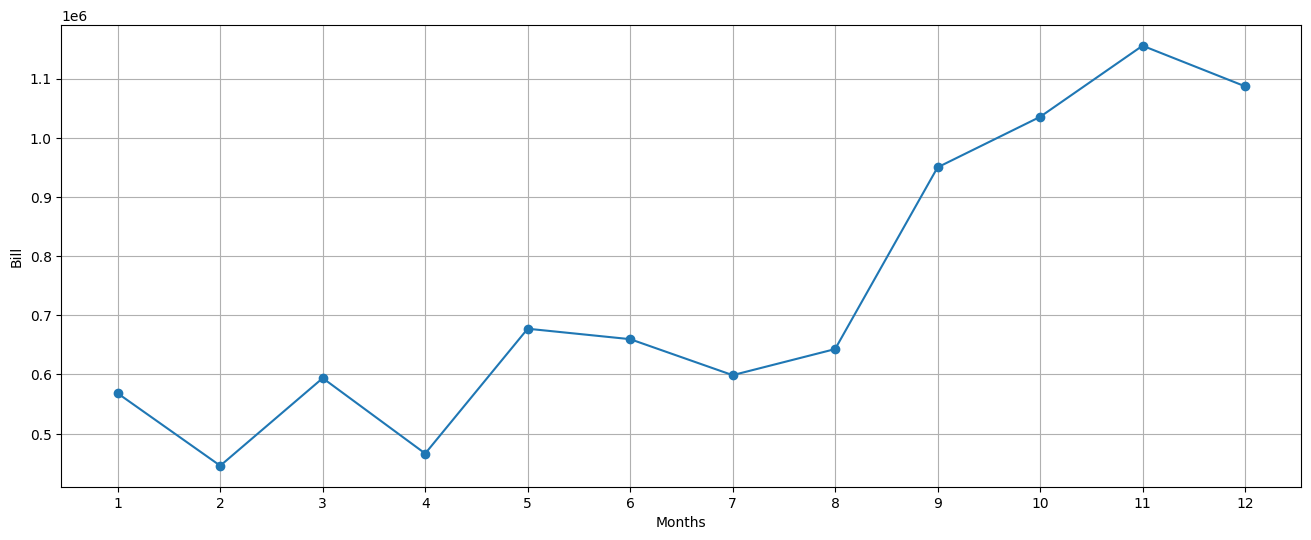

In [88]:
plt.figure(figsize=(16,6))
plt.plot(monthly.index,monthly.values,marker='o')
plt.xlabel("Months");
plt.ylabel("Bill")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
plt.show()

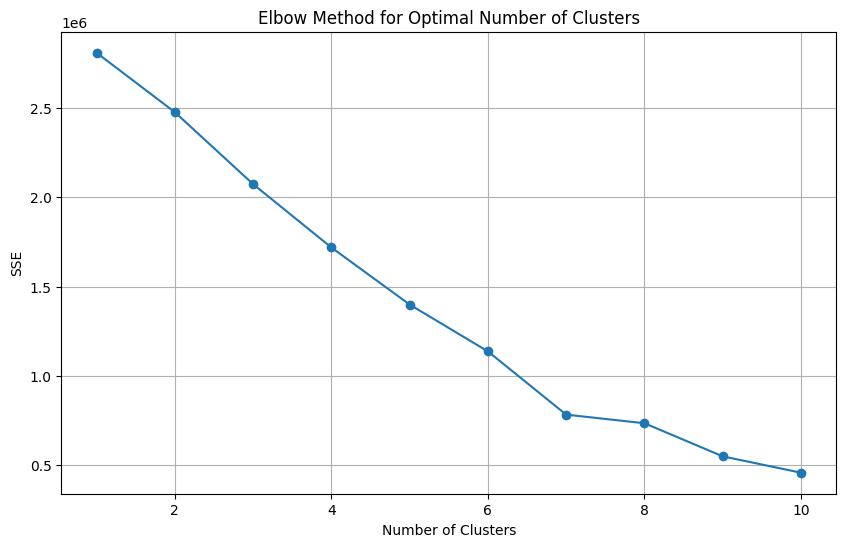

In [91]:
sse=[]
scaler = StandardScaler()
df_use = df.drop(['StockCode','Description','InvoiceDate','Country','InvoiceNo'],axis = 1)
scaled_features = scaler.fit_transform(df_use)
sse = []
for k in range(1, 11):  # Starting from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

In [92]:
#so n_cluster = 7

In [93]:
optimal_clusters = 7
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
df_use['Cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[-2.57542917e-03  4.84782971e-04 -8.29978426e-02 -1.09661672e+00
   2.65010402e-01 -3.75091092e-03 -1.54662591e-01]
 [-5.52372974e-03 -4.13909254e-03  5.47587885e-02  6.36280801e-01
   2.65010402e-01 -6.97367737e-03 -1.37651770e-01]
 [-5.93127163e-03 -3.71535536e-03  1.33298782e-01  1.28885486e+00
  -3.77343679e+00 -2.42945044e-03 -9.74208884e-02]
 [-3.10118020e+02 -2.74362861e-02 -5.16428690e-01 -3.20533885e-01
   2.65010402e-01 -2.85457728e+02 -3.66892938e-01]
 [-5.26735217e-02  5.58548175e+02 -1.06861374e-01 -4.66841952e-01
   2.65010402e-01 -9.06017455e+01 -3.45495864e-01]
 [ 1.54206821e-01  3.05548804e-02 -2.15433797e-01 -7.88766248e-02
   2.32012404e-01  1.97730406e-01  4.96466147e+00]
 [ 3.10020664e+02 -2.74362861e-02 -5.16428690e-01 -3.20533885e-01
   2.65010402e-01  2.85361929e+02 -3.66892938e-01]]


In [97]:
cluster_analysis = df_use.groupby('Cluster').mean()
print(cluster_analysis)

             Quantity     UnitPrice    CustomerID      Month         Year  \
Cluster                                                                     
0           11.526744      3.512795  15144.193864   3.831412  2011.000000   
1           10.811712      3.182964  15370.310635   9.759561  2011.000000   
2           10.698778      3.214866  15509.635457  12.000000  2010.000000   
3       -77605.000000      1.560000  14396.000000   6.500000  2011.000000   
4           -1.000000  38970.000000  15098.000000   6.000000  2011.000000   
5           50.771116      5.605255  14912.839601   7.326811  2010.991832   
6        77605.000000      1.560000  14396.000000   6.500000  2011.000000   

            total_bill  Annual_Spending  
Cluster                                  
0            19.006937      6429.236449  
1            17.610528      6940.999540  
2            19.568120      8162.909853  
3       -122826.600000         1.450000  
4        -38970.000000       649.500000  
5           

---

## Author :  Vedant Ganesh Badukale
Indian Institute Of Information Technology